In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

#titled_player details
titled_details_csv = "output_data/players_Titled.csv"

output_file=os.path.join("output_data","Titled_details.csv")
output_file_2=os.path.join("output_data","status_counts.csv")

In [5]:
file = os.path.join("output_data", "players_Titled.csv")
titled_details_df = pd.read_csv(file)
titled_details_df

highest_followers_titled_df = titled_details_df.sort_values("followers", ascending=False)
highest_followers_titled_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,last_online_converted,joined_converted
587,587,15448422,hikaru,GM,452442,US,"Sunrise, Florida",1609868166,1389043258,premium,True,1/5/2021,1/6/2014
1867,1867,1666963,danielrensch,IM,254915,US,@danielrensch Twitter/Facebook/YouTube,1609888222,1229802308,staff,True,1/5/2021,12/20/2008
5222,5222,2841449,mikeklein,FM,60717,US,Charlotte,1609861017,1274214391,staff,False,1/5/2021,5/18/2010
802,802,3889224,magnuscarlsen,GM,41756,NO,Norway,1607716439,1282856720,premium,False,12/11/2020,8/26/2010
444,444,13423970,ginger_gm,GM,38119,GB,Godalming,1609876760,1378461829,premium,False,1/5/2021,9/6/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6140,6140,52635754,vladimir_plokhotniuk,FM,0,RU,NaN,1608388734,1543689382,premium,False,12/19/2020,12/1/2018
2290,2290,101597530,junglebook25,IM,0,IN,NaN,1607324555,1607065998,premium,False,12/7/2020,12/4/2020
832,832,89655456,mayachiburdanidze,GM,0,GE,NaN,1599203231,1598173154,premium,False,9/4/2020,8/23/2020
6137,6137,32720550,vlad1drakula,FM,0,RU,NaN,1594879562,1485546066,premium,False,7/16/2020,1/27/2017


In [6]:

top_ten_followers_df = highest_followers_titled_df.head(10)
highest_followers_titled_df.head(10)


,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,last_online_converted,joined_converted
587,587,15448422,hikaru,GM,452442,US,"Sunrise, Florida",1609868166,1389043258,premium,True,1/5/2021,1/6/2014
1867,1867,1666963,danielrensch,IM,254915,US,@danielrensch Twitter/Facebook/YouTube,1609888222,1229802308,staff,True,1/5/2021,12/20/2008
5222,5222,2841449,mikeklein,FM,60717,US,Charlotte,1609861017,1274214391,staff,False,1/5/2021,5/18/2010
802,802,3889224,magnuscarlsen,GM,41756,NO,Norway,1607716439,1282856720,premium,False,12/11/2020,8/26/2010
444,444,13423970,ginger_gm,GM,38119,GB,Godalming,1609876760,1378461829,premium,False,1/5/2021,9/6/2013
6325,6325,28583276,alexandrabotez,WFM,37782,US,New York,1609820952,1465620232,premium,True,1/5/2021,6/11/2016
2952,2952,665161,silman,IM,31541,JP,Tokyo,1606762033,1197535122,premium,False,11/30/2020,12/13/2007
7122,7122,9261,danheisman,NM,24084,US,"Wynnewood, PA",1608840772,1184589688,premium,False,12/24/2020,7/16/2007
476,476,6610376,gmhess,GM,21004,US,New York,1609897210,1328309744,staff,True,1/6/2021,2/3/2012
562,562,1748429,gserper,GM,18214,US,"Seattle, WA",1609889450,1233786457,premium,False,1/5/2021,2/4/2009


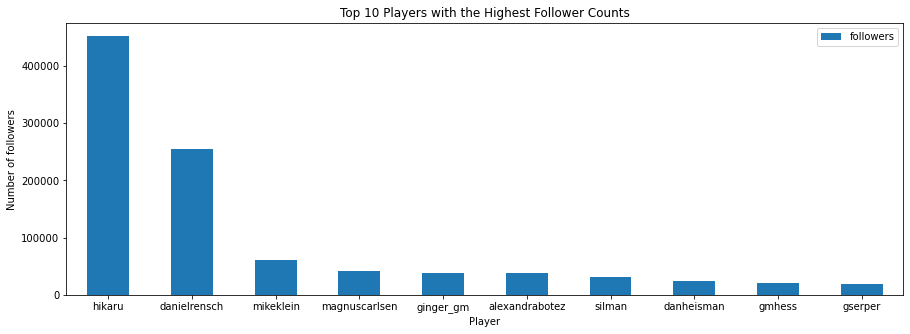

In [47]:
top_ten_followers_df.to_csv(output_file,index=True, header=True)
top_ten_followers_df.plot.bar(x="username", y="followers", rot=0, align="center", figsize=(15,5))
plt.ylabel("Number of followers")
plt.xlabel("Player")
plt.title("Top 10 Players with the Highest Follower Counts")
plt.show()

In [27]:

grouped_status_titled_df = status_details_df.groupby(["status"])
count_groupby_status = grouped_status_titled_df.count()
count_groupby_status

,username
status,
basic,8
mod,2
premium,9259
staff,31


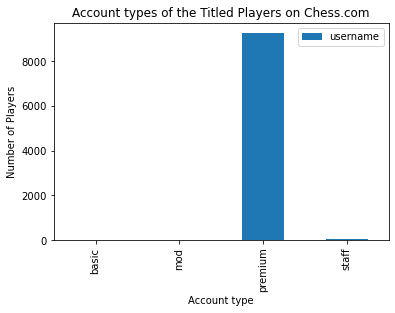

In [37]:
count_groupby_status.plot.bar()
plt.ylabel("Number of Players")
plt.xlabel("Account type")
plt.title("Account types of the Titled Players on Chess.com")
plt.show()

In [19]:
grouped_title_count_df = titled_details_df.groupby(["title"])
title_count_df= grouped_title_count_df.count()
title_count_df

,player_index,player_id,username,followers,country,location,last_online,joined,status,is_streamer,last_online_converted,joined_converted
title,,,,,,,,,,,,
CM,829,829,829,829,827,439,829,829,829,829,829,829
FM,2699,2699,2699,2699,2699,1426,2699,2699,2699,2699,2699,2699
GM,1315,1315,1315,1315,1315,701,1315,1315,1315,1315,1315,1315
IM,1769,1769,1769,1769,1768,962,1769,1769,1769,1769,1769,1769
NM,1448,1448,1448,1448,1448,852,1448,1448,1448,1448,1448,1448
WCM,239,239,239,239,237,82,239,239,239,239,239,239
WFM,475,475,475,475,475,185,475,475,475,475,475,475
WGM,193,193,193,193,193,77,193,193,193,193,193,193
WIM,328,328,328,328,328,118,328,328,328,328,328,328


In [29]:
title_counts = title_count_df["username"]
title_counts


title
CM      829
FM     2699
GM     1315
IM     1769
NM     1448
WCM     239
WFM     475
WGM     193
WIM     328
WNM       5
Name: username, dtype: int64

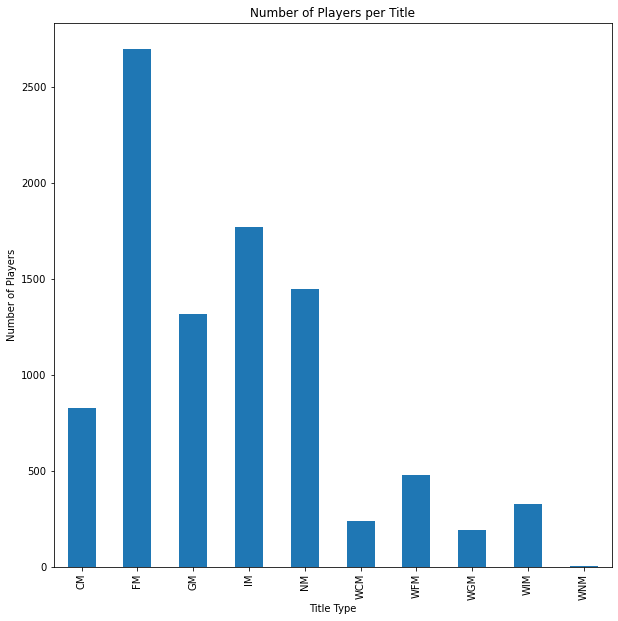

In [39]:
title_counts.plot.bar(figsize=(10,10))
plt.ylabel("Number of Players")
plt.xlabel("Title Type")
plt.title("Number of Players per Title")
plt.show()


In [43]:
grouped_titled_country_count_df = titled_details_df.groupby(["country"])
country_count_titled_df= grouped_titled_country_count_df.count()
country_count_titled_df

,player_index,player_id,username,title,followers,location,last_online,joined,status,is_streamer,last_online_converted,joined_converted
country,,,,,,,,,,,,
AD,3,3,3,3,3,0,3,3,3,3,3,3
AE,27,27,27,27,27,9,27,27,27,27,27,27
AF,4,4,4,4,4,3,4,4,4,4,4,4
AG,2,2,2,2,2,0,2,2,2,2,2,2
AL,9,9,9,9,9,7,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
XX,98,98,98,98,98,18,98,98,98,98,98,98
YE,3,3,3,3,3,2,3,3,3,3,3,3
ZA,53,53,53,53,53,29,53,53,53,53,53,53


In [45]:
country_count = country_count_titled_df["username"]
country_count

country
AD     3
AE    27
AF     4
AG     2
AL     9
      ..
XX    98
YE     3
ZA    53
ZM     9
ZW     4
Name: username, Length: 206, dtype: int64

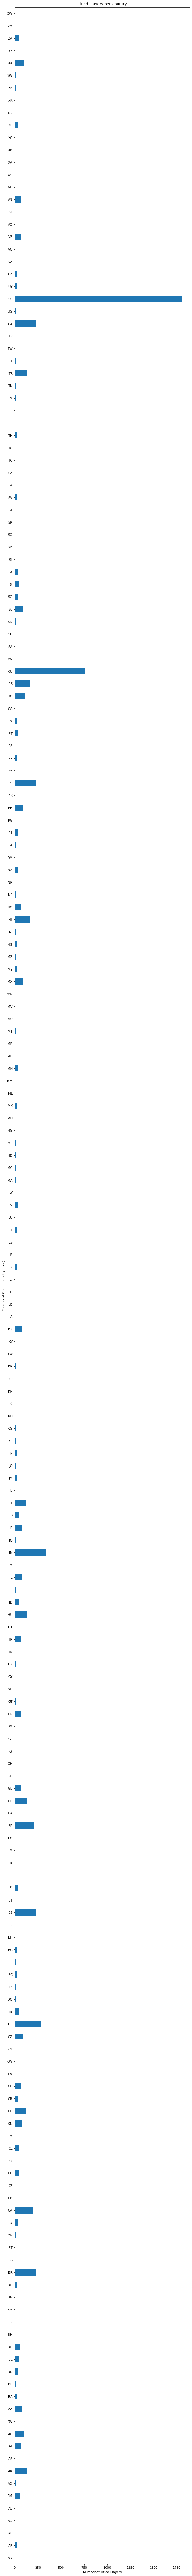

In [55]:
country_count.plot.barh(figsize=(10, 150))
plt.ylabel("Country of Origin (country code)")
plt.xlabel("Number of Titled Players")
plt.title("Titled Players per Country")
plt.show()